In [11]:
%pip install matplotlib
%pip install seaborn
%pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
import string

# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt  
import seaborn as sns

# Import evaluation metric librarie
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

import nltk 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Minhal
[nltk_data]     Ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
df=pd.read_csv('spam_ham_dataset.csv')

In [15]:
df['text']=df['text'].apply(lambda x:x.replace('\r\n',' '))

In [16]:
df.text.iloc[1]

'Subject: hpl nom for january 9 , 2001 ( see attached file : hplnol 09 . xls ) - hplnol 09 . xls'

In [17]:
df.info()
#1 for spam and 0 for ham

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [18]:
stemmer=PorterStemmer()

In [19]:
stemmer.stem('sophistication')


'sophist'

In [21]:
stemmer=PorterStemmer() #A stemming algorithm
corpus =[] #An empty list to store the preprocessed text for each email.

stopwords_set=set(stopwords.words('english'))#A predefined list of common English words (like "is," "the," "and")
set(stopwords.words('english')) #Converts the stopwords list into a set

for i in range(len(df)):#Iterating Over the Dataframe

    text=df['text'].iloc[i].lower()#Converts the text of the email at index i to lowercase to ensure uniformity.
    text=text.translate(str.maketrans('','',string.punctuation)).split()#Removes punctuation 
    text=[stemmer.stem(word) for word in text if word not in stopwords_set]
    text=' '.join(text)
    corpus.append(text)

In [22]:
df.text.iloc[0]

"Subject: enron methanol ; meter # : 988291 this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary flow data provided by daren } . please override pop ' s daily volume { presently zero } to reflect daily activity you can obtain from gas control . this change is needed asap for economics purposes ."

In [23]:
corpus[0]

'subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos'

In [24]:
vectorizer=CountVectorizer()

X=vectorizer.fit_transform(corpus).toarray()
y=df.label_num

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [25]:
X[0]

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
clf=RandomForestClassifier(n_jobs=-1)
clf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [27]:
clf.score(X_test,y_test)

0.970048309178744

In [28]:
email_to_classify=df.text.values[10]

In [29]:
email_to_classify

"Subject: vocable % rnd - word asceticism vcsc - brand new stock for your attention vocalscape inc - the stock symbol is : vcsc vcsc will be our top stock pick for the month of april - stock expected to bounce to 12 cents level the stock hit its all time low and will bounce back stock is going to explode in next 5 days - watch it soar watch the stock go crazy this and next week . breaking news - vocalscape inc . announces agreement to resell mix network services current price : $ 0 . 025 we expect projected speculative price in next 5 days : $ 0 . 12 we expect projected speculative price in next 15 days : $ 0 . 15 vocalscape networks inc . is building a company that ' s revolutionizing the telecommunications industry with the most affordable phone systems , hardware , online software , and rates in canada and the us . vocalscape , a company with global reach , is receiving international attention for the development of voice over ip ( voip ) application solutions , including the award 

In [30]:
email_text=email_to_classify.lower().translate(str.maketrans('','',string.punctuation)).split()
email_text=[stemmer.stem(word) for word in text if word not in stopwords_set]
email_text=' '.join(email_text)

email_corpus=[email_text]

X_email=vectorizer.transform(email_corpus)

In [31]:
clf.predict(X_email)

array([1], dtype=int64)

In [32]:
df.label_num.iloc[10]

1

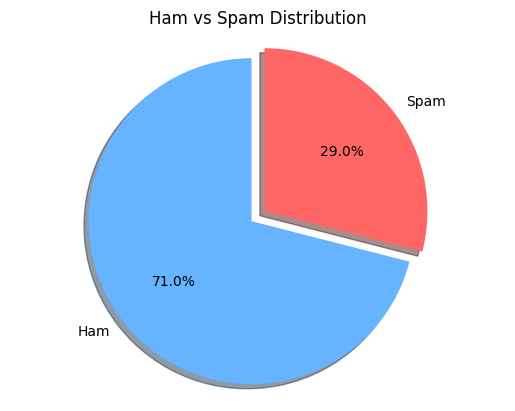

In [33]:

ham_count = df[df['label'] == 'ham'].shape[0]
spam_count = df[df['label'] == 'spam'].shape[0]
# Data for the pie chart
labels = ['Ham', 'Spam']
sizes = [ham_count, spam_count]
colors = ['#66b3ff', '#ff6666']  # Custom colors for better visualization
explode = (0.1, 0)  # Explode the 'Ham' slice 

# Create the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

# Equal aspect ratio ensures that the pie is drawn as a circle.
plt.axis('equal')

# Title of the pie chart
plt.title('Ham vs Spam Distribution')

# Show the plot
plt.show()


In [34]:
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    classification_report
)

# Step 1: Predict the labels for the test dataset
y_pred = clf.predict(X_test)

# Step 2: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Step 3: Calculate other metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print precision, recall, and F1-score
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Step 4: Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Step 5: Classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Accuracy: 0.97
Precision: 0.94
Recall: 0.95
F1-Score: 0.95

Confusion Matrix:
[[718  17]
 [ 14 286]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       735
           1       0.94      0.95      0.95       300

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.96      1035
weighted avg       0.97      0.97      0.97      1035

